Accuracy: 0.75
Precision: 0.83
Recall: 0.83


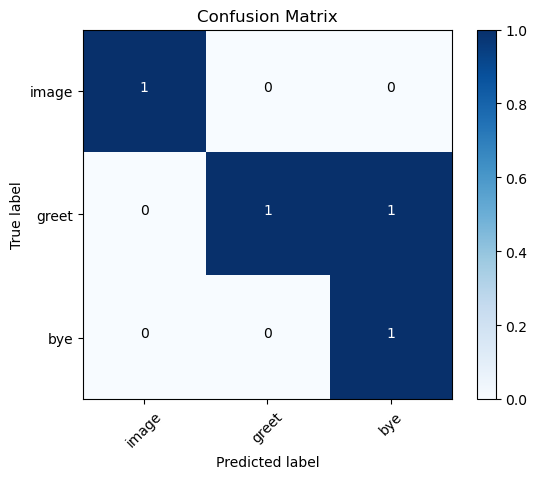

Bot (Text): I am a large language model, trained by Google.  I'm an AI, and I don't have a name or personal experiences like a human does.  My purpose is to process information and respond to a wide range of prompts and questions.



In [ ]:
# -----------------------------
# 1. Imports
# -----------------------------
import os
import itertools
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import google.generativeai as genai
from tkinter import Tk, filedialog
from dotenv import load_dotenv

# -----------------------------
# 2. Load API Key from .env
# -----------------------------
load_dotenv()  # Load .env file in notebook folder
API_KEY = os.getenv("GOOGLE_API_KEY")
if not API_KEY:
    raise ValueError("❌ GOOGLE_API_KEY not set in .env file!")

genai.configure(api_key=API_KEY)
model = genai.GenerativeModel("gemini-1.5-flash")  # Use Gemini 1.5 Flash

# -----------------------------
# 3. Evaluation Demo
# -----------------------------
y_true = ["greet", "bye", "greet", "image"]
y_pred = ["greet", "bye", "bye", "image"]

labels = list(set(y_true))
cm = confusion_matrix(y_true, y_pred, labels=labels)
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average="macro")
rec = recall_score(y_true, y_pred, average="macro")

print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")

# Confusion matrix plot
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

# -----------------------------
# 4. Chatbot Demo (Text)
# -----------------------------
try:
    response = model.generate_content("Hello, who are you?")
    print("Bot (Text):", response.text)
except Exception as e:
    print("Error in text query:", str(e))

# -----------------------------
# 5. Image Understanding
# -----------------------------
try:
    # Dynamically select any image
    Tk().withdraw()
    image_path = filedialog.askopenfilename(title="Select an image for the bot to analyze")
    if not image_path:
        raise FileNotFoundError("No image selected!")

    image = Image.open(image_path)

    response = model.generate_content([
        "Describe what you see in this image:",
        image
    ])
    print("Bot (Image Understanding):", response.text)
except Exception as e:
    print("Error in image query:", str(e))
